<a href="https://colab.research.google.com/github/skml29/Trabajo-de-investigaci-n/blob/skml29-codes/RobinLaplacian1D_and_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenvalues of the 1D Robin Laplacian 

## The scaled problem with $\alpha <0$

$$
\frac{d^2v}{dt^2} + R^2\lambda\, v =0, \quad t\in (-1,1)
$$

$$
v'(1) - \beta\, v(1) = 0, \quad v'(-1)+  \beta\, v(-1) = 0. 
$$

Here $\beta = -\alpha\, R$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
pi = np.pi
beta_max = pi

## Negative scaled eigenvalues

Setting $\omega^2 = -R^2\,\lambda$,  the RL problem reduces to its scaled version: 

$$
\frac{d^2v}{dt^2} - \omega^2\, v =0, \quad t\in (-1,1)
$$

$$
v'(1) - \beta\, v(1) = 0, \quad v'(-1)+  \beta\, v(-1) = 0. 
$$

The scaled igenvalues $\omega$ satisfy

$$
\omega\, \sinh{\omega} - \beta\,  \cosh{\omega} = 0 \quad \text{ or} \quad \omega\, \cosh{\omega} - \beta\,  \sinh{\omega} = 0. 
$$

For a given $0<\beta<1$, there exists exactly one scaled eigenvalue $sc_1(\beta)$ whereas for $1<\beta$ there exists an aditional scaled eigenvalue $sc_2(\beta)$


In [ ]:
def scaled1(b):
    b0 = b
    val = fsolve(lambda w: w- b*np.cosh(w)/np.sinh(w), [b0])[0]  
    return ((val)**2)

In [ ]:
def scaled2(b):
    b0 = b
    val = fsolve(lambda w: w- b*np.tanh(w), [b0])[0] 
    return ((val)**2)

In [ ]:
beta1 = np.arange(0.001, beta_max, 0.1 )
beta2 = np.arange(1.001, beta_max, 0.1)
s1 = [scaled1(b) for b in beta1]
s2 = [scaled2(b) for b in beta2]

In [ ]:
from scipy.interpolate import interp1d
sc1 = interp1d(beta1, s1, kind='cubic')
sc2 = interp1d(beta2, s2, kind='cubic')

In [ ]:
sc1(0.7*0.5)/0.25

1.5796113452330423

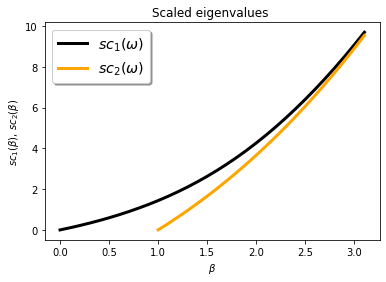

In [ ]:
fig, ax = plt.subplots()
ax.plot(beta1, sc1(beta1),  linewidth=3, color = 'k',\
        label='$sc_1(\omega)$')
ax.plot(beta2, sc2(beta2),  linewidth=3, color = 'orange', \
       label='$sc_2(\omega)$')
ax.set(xlabel=r'$\beta$', ylabel=r'$ sc_1(\beta),\, sc_2(\beta)$ ',
       title=r'Scaled eigenvalues ')
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

The negative eigenvalues are easily obtained from the scaled eigenvalues as follows:  

-- For $R$ fixed: 

* $\lambda_f(R, \alpha) = -\frac{sc_1(\beta)}{R^2}$

* $\lambda_s(R, \alpha) = -\frac{sc_2(\beta)}{R^2}$

## Positive scaled eigenvalues

Setting $\omega^2 = R^2\,\lambda$,  the RL problem reduces to its scaled version: 

$$
\frac{d^2v}{dt^2} + \omega^2\, v =0, \quad t\in (-1,1)
$$

$$
v'(1) - \beta\, v(1) = 0, \quad v'(-1)+  \beta\, v(-1) = 0. 
$$

The scaled positive igenvalues $\omega$ satisfy

$$
\omega\, \sin{\omega} + \beta\,  \cos{\omega} = 0 \quad \text{ or} \quad \omega\, \cos{\omega} - \beta\,  \sin{\omega} = 0. 
$$

For a given $0<\beta$, there are two discrete sets of positive scaled eigenvalues. Each set is infinit but we choose the first 3 elements of each one.  


In [ ]:
def pos1_scaled(b):
    step, nmax = pi, 4
    b0, ps = 3*pi/4, []
    for n in range(nmax):
        val = fsolve(lambda w: w*np.sin(w)+ b*np.cos(w), [b0])[0] 
        ps.append((val)**2) 
        b0 = val + step
    return (np.array(ps))

In [ ]:
def pos2_scaled(b):
    step, nmax = pi, 4
    b0, ps = pi/2-b, []
    if b>1: b0 = pi +pi/6
    for n in range(nmax):
        val = fsolve(lambda w: w*np.cos(w)- b*np.sin(w), [b0])[0] 
        ps.append((val)**2) 
        b0 = val + step
    return (np.array(ps))

In [ ]:
b = 7
(pos1_scaled(b), pos2_scaled(b))

(array([  3.33413724,  28.79881167,  76.56318607, 144.95518837]),
 array([ 13.09510199,  50.03906066, 108.22851775, 186.69734002]))

In [ ]:
#fst_s = lambda b: np.sort(np.append(pos1_scaled(b),pos2_scaled(b)))[0]
bb = np.arange(1/100, 1.0, 0.05)
p2 = [pos2_scaled(b)[0] for b in bb]
p1 = [pos1_scaled(b)[0] for b in bb]
n1 = [scaled1(b) for b in bb ]


In [ ]:
bb = np.arange(1+1/100, 3.5, 0.05)
p2 = [pos2_scaled(b)[0] for b in bb]
p1 = [pos1_scaled(b)[0] for b in bb]
n1 = [scaled1(b) for b in bb ]
n2 = [scaled2(b) for b in bb ]

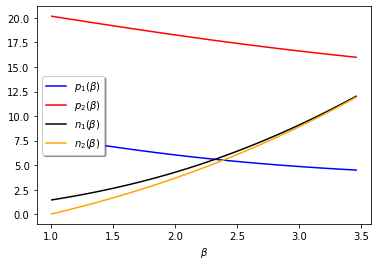

In [ ]:
fig, ax = plt.subplots()
ax.plot(bb, p1,color = 'b', label=r'$p_1(\beta)$') 
ax.plot(bb, p2,color = 'r', label=r'$p_2(\beta)$')
ax.plot(bb, n1, color = 'k',label =r'$n_1(\beta)$') 
ax.plot(bb, n2, color = 'orange', \
        label =r'$n_2(\beta)$')
ax.set(xlabel=r'$\beta$', ylabel=r'', \
       title='')
ax.legend(loc='center left', shadow=True)
plt.show()